#Kentaro Tanaka Final Project

In [1]:
#part 1
import pandas as pd 
import matplotlib.pyplot as plot
import seaborn as sns


In [2]:
#create function 

def getDataFrame(set): 
    path = "/Users/kenny/Downloads/passengers_" + str(set) + ".csv"
    df = pd.read_csv(path)
    set_column_data = [str(set)] * df.shape[0]
    df["set"] = set_column_data 
    df = df[["PassengerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin"]]
    return df

In [3]:
# merge first 5 data sets with similar columns by concatenation 

df1 = getDataFrame(1) 

df2 = getDataFrame(2)

df3 = getDataFrame(3)

df4 = getDataFrame(4) 

df5 = getDataFrame(5) 

df6 = pd.concat([df1,df2,df3,df4,df5])

print(df6)

    PassengerId  Pclass                                          Name     Sex  \
0           892       3                              Kelly, Mr. James    male   
1           893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2           894       2                     Myles, Mr. Thomas Francis    male   
3           895       3                              Wirz, Mr. Albert    male   
4           896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
..          ...     ...                                           ...     ...   
13         1305       3                            Spector, Mr. Woolf    male   
14         1306       1                  Oliva y Ocana, Dona. Fermina  female   
15         1307       3                  Saether, Mr. Simon Sivertsen    male   
16         1308       3                           Ware, Mr. Frederick    male   
17         1309       3                      Peter, Master. Michael J    male   

     Age  SibSp  Parch     

In [4]:
#merge sixth file by merging dataframes

path1 = "/Users/kenny/Downloads/passengers_embarked_and_survived.csv"

df7 = pd.read_csv(path1)

df8 = df6.merge (df7, how = "left", on = "PassengerId")

print(df8)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0

Part 1 Writeup: 

I first imported and combined the .csv files in a few steps. Firstly, I uploaded all the CSV files into my Jupyter Notebook's libarary. From there I referenced the data by inserting the link for each of the csv files. I then combined the first five data sets through concatenation since they all had the same column names and columns. From there I merged the sixth file by using a left join and adding two more columns for point of embarkment and whether they survived or not. An important takeaway from this I had is that data sets with the same column names are much easier to combine than ones without, since they can be combined in bulk (in this case all five of the first files at once). 

In [5]:
#part 2
#1. find missing values 
df8.isnull()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False,False
416,False,False,False,False,True,False,False,False,False,True,False,False


In [6]:
#2. Mean and standard deviation of age 
print(df8["Age"].mean())
print(df8["Age"].std())

30.272590361445783
14.18120923562442


In [7]:
#3. Min and Max values of age
print(df8["Age"].min())
print(df8["Age"].max())

0.17
76.0


In [8]:
#4. Sum of Survivors 
print(df8["Survived"].sum())

152


In [9]:
#5. Number of Passengers 
print(df8["PassengerId"].count())

418


Part 2 Writeup: 
Here I decided to use a few different metrics to explore the data. Firstly, I looked at how many null values there are in the data set. By using this, I can see if the data set is complete, and if analysis can be done with all data available. After this I looked into the mean and standard deviation of the age. The mean was around 30 years old and the standard deviation was 14.2. This tells me that there are many middle-aged adults as a part of this data set. Next I looked into the minimum and maximum age, and found out that the oldest person onboard was 76 years old and the youngest was a baby that wasn't even one years old yet. From there I looked atthe total number of passengers and the total number of passengers who survived to get an idea of how many passengers were onboard and how many were able to survive. All of these metrics gave me a basic idea of the type of data I am working with and the numbers that I can expect when I do analysis on different factors. For example, if I do an analysis on age and there are a large amount of older or younger people, I can tell that something is wrong with my analysis since the mean age is 30 and the standard deviation is 15. 

In [10]:
#part 3 

#1. rename columns 

df9 = df8.rename (columns = { "Pclass":"Passenger Class", "SibSp":"Siblings and Spouses", "Parch":"Parents and Children"})
print(df9)

     PassengerId  Passenger Class  \
0            892                3   
1            893                3   
2            894                2   
3            895                3   
4            896                3   
..           ...              ...   
413         1305                3   
414         1306                1   
415         1307                3   
416         1308                3   
417         1309                3   

                                             Name     Sex   Age  \
0                                Kelly, Mr. James    male  34.5   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0   
2                       Myles, Mr. Thomas Francis    male  62.0   
3                                Wirz, Mr. Albert    male  27.0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0   
..                                            ...     ...   ...   
413                            Spector, Mr. Woolf    male   NaN   
414                

In [11]:
#2. Changing Age column null values to 0 
df9.loc[df9["Age"].isnull(), "Age"] = 0
print(df9)


     PassengerId  Passenger Class  \
0            892                3   
1            893                3   
2            894                2   
3            895                3   
4            896                3   
..           ...              ...   
413         1305                3   
414         1306                1   
415         1307                3   
416         1308                3   
417         1309                3   

                                             Name     Sex   Age  \
0                                Kelly, Mr. James    male  34.5   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0   
2                       Myles, Mr. Thomas Francis    male  62.0   
3                                Wirz, Mr. Albert    male  27.0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0   
..                                            ...     ...   ...   
413                            Spector, Mr. Woolf    male   0.0   
414                

In [12]:
#3 Selecting columns for analysis 
df10 = (df9 [["PassengerId","Passenger Class", "Sex", "Age", "Siblings and Spouses", "Parents and Children", "Fare", "Embarked", "Survived"]])
print(df10)

     PassengerId  Passenger Class     Sex   Age  Siblings and Spouses  \
0            892                3    male  34.5                     0   
1            893                3  female  47.0                     1   
2            894                2    male  62.0                     0   
3            895                3    male  27.0                     0   
4            896                3  female  22.0                     1   
..           ...              ...     ...   ...                   ...   
413         1305                3    male   0.0                     0   
414         1306                1  female  39.0                     0   
415         1307                3    male  38.5                     0   
416         1308                3    male   0.0                     0   
417         1309                3    male   0.0                     1   

     Parents and Children      Fare Embarked  Survived  
0                       0    7.8292        Q         0  
1        

Part 3 Writeup: 

In this part, I manipulated the data so that it would be ready for analysis. The first manipulation I did was rename some of the column names to make them clearer. Personally I did not know what the columns meant until I read the guide. This means that some of the column names can definitely be renamed for easier understanding. Next, I replaced the null values in the age column to zero. By replacing them to zero when analysis is done on them, it would be done with a number and proper values will be calculated and outputted. Lastly I selected only the columns that I will be using for analysis, which are all the metric unit columns along with sex, and embarked location. By lowering the amount of columns available the data set is now ready for analysis and any excess columns are not included. 

In [13]:
#Part 4 
#1. Men/Women 

condition1 = df10["Sex"] == "male"
condition2 = df10["Sex"] == "female"
condition3 = df10["Survived"] == 1


df11 = df10[condition2 & condition3].count()

df12 = df10[condition1 & condition3].count()

df13 = df10[condition3].count()
    

print(df11["PassengerId"]/df13["PassengerId"])

print(df12["PassengerId"]/df13["PassengerId"])


1.0
0.0


In [14]:
#2. By Age
condition4 = df10["Age"] >= 30 
condition5 = df10["Age"] < 30 

df14 = df10[condition4 & condition3].count()
df15 = df10[condition5 & condition3].count()

print(df14["PassengerId"]/df13["PassengerId"])
print(df15["PassengerId"]/df13["PassengerId"])


0.3684210526315789
0.631578947368421


In [15]:
#3. By Passenger Class of Ticket 

condition6 = df10["Passenger Class"] == 3
condition7 = df10["Passenger Class"] == 2 
condition8 = df10["Passenger Class"] == 1 

df16 = df10[condition6 & condition3].count()
df17 = df10[condition7 & condition3].count()
df18 = df10[condition8 & condition3].count() 

print(df16["PassengerId"]/df13["PassengerId"])
print(df17["PassengerId"]/df13["PassengerId"])
print(df18["PassengerId"]/df13["PassengerId"])


0.47368421052631576
0.19736842105263158
0.32894736842105265


Part 4 Writeup: 

Analysis #1: I chose share of men who survived and the share of women who survived because I thought this was an important metric to determine the geographic of the people who survived. The results suggest this even further with 100 % of women surviving and an astonishing 0% of men surviving. At first I thought there was something wrong with my analysis, but the actual reality was that no men survived.The process that I took was fairly simple. I first got the total count of men who survived and the total count of women who survived then divided them by the total number of men and the total number of women respectively to end with the total percent of each gender that survived. 

Analysis #2: For my second analysis I decided to get the percentage of people over the age of 30 that survived, and the percent of people 30 or under that survived. I wasn't surprised to see that a higher percentage (65.15%) of people over the age of 30 survive, since under 30 include all the minors that were on the ship also. I would presume that adults have a higher chance to survive in a disaster than children. 

Analysis #3: Lastly, I did an analysis on the class of the passenger and the survival rate. I would think that the classes are in different locations (higher in the boat or lower in the boat), therefore the survival rate would be quite different for each class. Which, turns out they were, with class two having the lowest survival rate of 19.7%. This differed greatly from class 1 which had a 47.37% of survival, the class must have been in a location that was easy for people to escape or get to safety during the disaster. Class 3 was in the middle with 32.89%.

Text(0, 0.5, 'Fare')

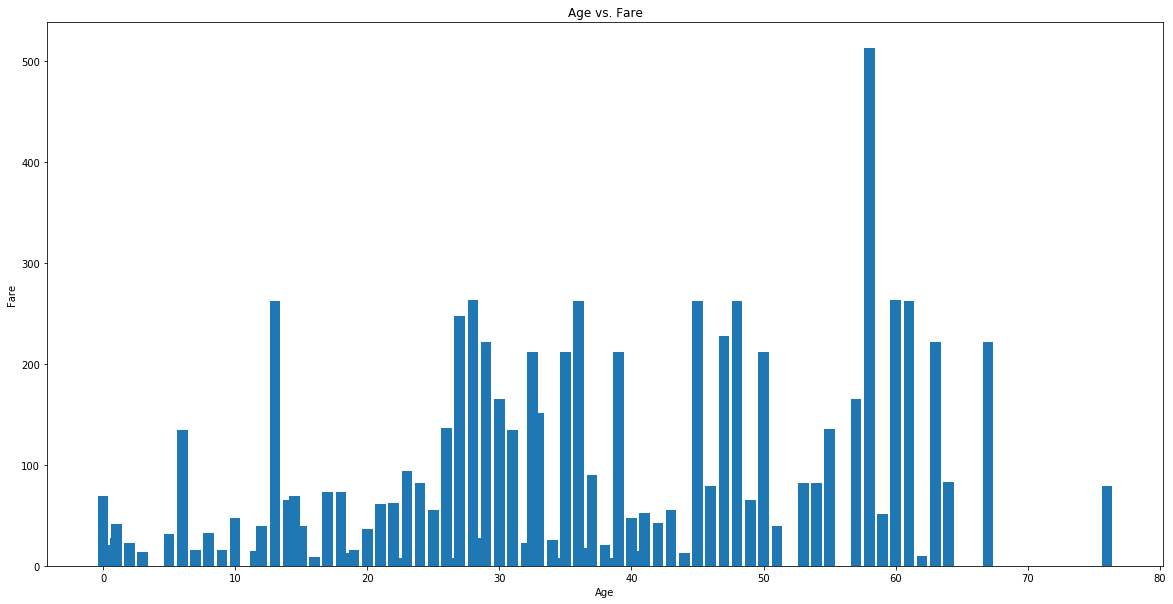

In [16]:
#Part 5
#1. Age vs. Fare 

figure, axis = plot.subplots(figsize = (20, 10))

axis.bar(df10["Age"], df10["Fare"])

axis.set_title ("Age vs. Fare")
axis.set_xlabel ("Age")
axis.set_ylabel ("Fare")

Text(0, 0.5, 'Sex')

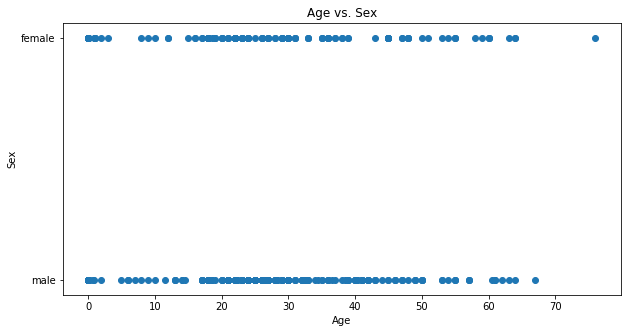

In [17]:
#2. Sex vs. Age (Distribution)

figure, axis = plot.subplots(figsize = (10, 5))

axis.scatter(df10["Age"], df10["Sex"])

axis.set_title ("Age vs. Sex")
axis.set_xlabel ("Age")
axis.set_ylabel ("Sex")


Text(0, 0.5, 'Age')

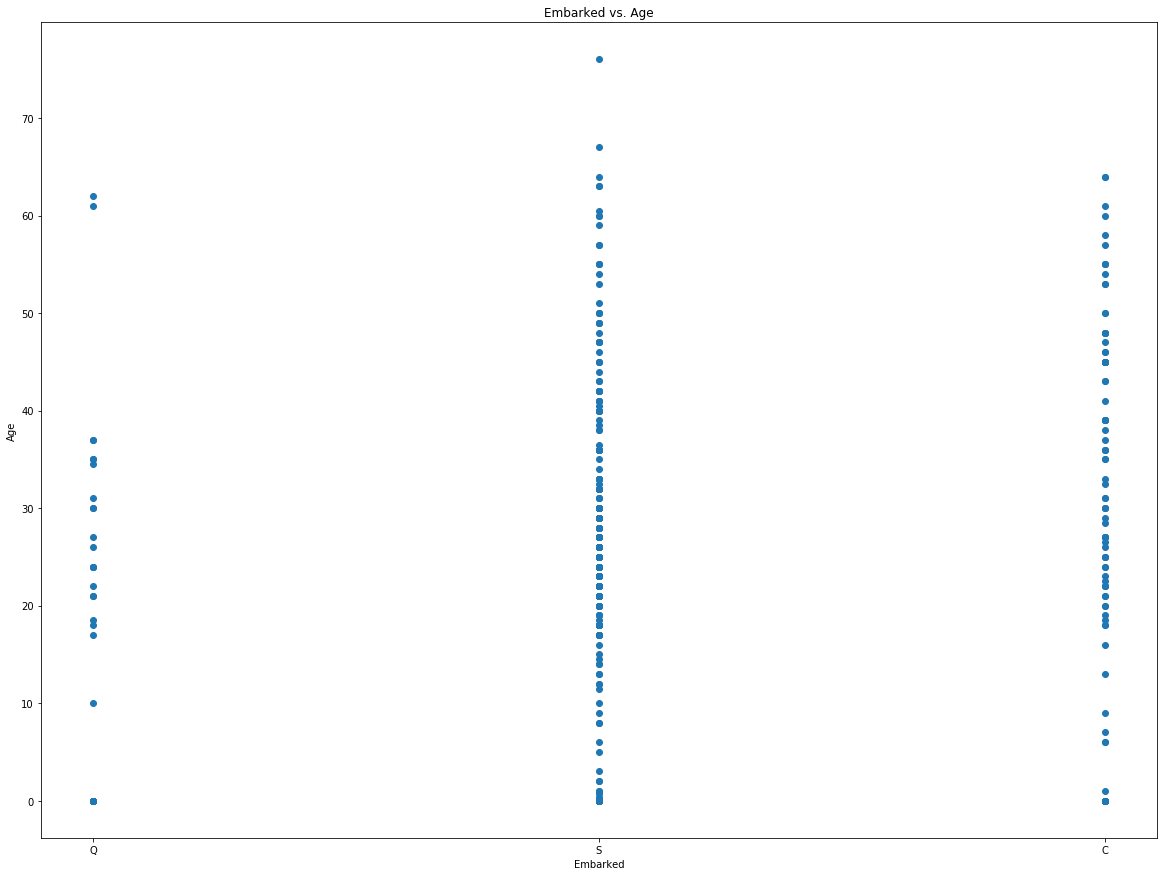

In [18]:
#3 Scatterplot: Point of Embarkment vs. Age (Distribution)

figure, axis = plot.subplots(figsize = (20, 15))

axis.scatter(df10["Embarked"], df10["Age"])

axis.set_title ("Embarked vs. Age")
axis.set_xlabel ("Embarked")
axis.set_ylabel ("Age")

Part 5 Writeup: 

In Part 5 I wanted to try using two different kinds of visualizations. I wanted to try using the line plot also, but since there was no time series data to work with, I stuck with bar plot and scatter plots. For the first plot, it can be shown that there was an outlier in fair, for the age of around 58, the fair jumped up suddenly for that age. Another insight is the fair generally lessened as the age got younger. In the next plot, I compared sex to age, and one insight that can be taken away from it, is that the male age range is higher than that of the females. Also the values are much more spread out for males, while female ages tended to be mainly between 15-50 years old. For the last plot I did point embarked vs age. Here it can be seen that the age range for people embarked from Cherbourg was higher than that of Queenstown. People embarking from Queenstown were fairly young compared to embarkments from other locations. I mainly used scatterplots to illustrate the distribution of age. For bar charts, it was harder to see the distribution of multiple x values. 